In [1]:
from platform import python_version

print(python_version())

3.9.13


### Importing Necessary Libraries

In [2]:
#importing basic library to perform EDA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler

In [3]:
train_data = pd.read_csv('CS98XClassificationTrain.csv')
train_data.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [4]:
train_data.tail()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
448,449,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,450,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,451,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,452,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band
452,453,In The Army Now,Status Quo,2002,105,73,68,-8,14,94,281,11,2,59,album rock


In [5]:
rows, columns = train_data.shape
print('Dataset consists of {} rows and {} columns'.format(rows, columns))

Dataset consists of 453 rows and 15 columns


In [6]:
# printing all column names 
cols = list(train_data.columns.values)
print("List of columns in dataset: ")
for i in range(len(cols)):
    print(cols[i])

List of columns in dataset: 
Id
title
artist
year
bpm
nrgy
dnce
dB
live
val
dur
acous
spch
pop
top genre


In [7]:
# getiing column info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [8]:
train_data = train_data.drop(['Id'], axis = 1)
train_data

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band


In [9]:
# finding NA or NUll values
train_data[:].isna().any()

title        False
artist       False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
top genre     True
dtype: bool

In [10]:
train_data.isnull().sum()

title         0
artist        0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
top genre    15
dtype: int64

In [11]:
train_data = train_data.dropna()

In [12]:
train_data.shape

(438, 14)

In [13]:
train_data.head()

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
2,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
5,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,223,15,6,74,pop


In [14]:
train_data.tail()

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
448,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band
452,In The Army Now,Status Quo,2002,105,73,68,-8,14,94,281,11,2,59,album rock


In [15]:
# getting statistical information of numerical columns
train_data.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,1990.881279,118.326484,60.504566,59.780822,-8.787671,17.605023,59.625571,228.267123,32.191781,5.671233,61.557078
std,16.697047,25.175735,22.089660,15.404757,3.591005,13.807492,24.480160,63.426812,29.279912,5.571392,12.759353
min,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,1976.000000,100.000000,44.000000,50.000000,-11.000000,9.000000,42.250000,184.500000,7.000000,3.000000,54.000000
50%,1993.000000,120.000000,64.000000,62.000000,-8.000000,13.000000,61.000000,224.000000,23.000000,4.000000,64.000000
75%,2006.000000,133.000000,78.000000,70.750000,-6.000000,23.000000,80.000000,264.000000,57.000000,6.000000,72.000000
max,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,99.000000,47.000000,84.000000


In [16]:
uniqueValuestg = (train_data['top genre']).unique()
uniqueValuestg

array(['adult standards', 'glam rock', 'pop', 'album rock', 'boy band',
       'brill building pop', 'rock-and-roll', 'country rock',
       'canadian pop', 'dance pop', 'europop', 'bebop', 'art rock',
       'disco', 'blues', 'barbadian pop', 'deep adult standards',
       'deep house', 'atl hip hop', 'dance rock', 'disco house',
       'bubblegum dance', 'classic soul', 'classic uk pop',
       'east coast hip hop', 'doo-wop', 'britpop', 'british blues',
       'soft rock', 'australian talent show', 'art pop', 'british soul',
       'british invasion', 'belgian pop', 'big room', 'german dance',
       'italian pop', 'british folk', 'brit funk', 'chicago soul',
       'neo mellow', 'british comedy', 'hip hop', 'new wave pop',
       'eurodance', 'detroit hip hop', 'classic rock', 'uk garage',
       'afrobeat', 'r&b', 'chicago rap', 'classic danish pop',
       'british dance band', 'drone folk', 'permanent wave', 'merseybeat',
       'g funk', 'blues rock', 'celtic rock', 'bow pop',


In [17]:
len(uniqueValuestg)

86

In [18]:
train_data['top genre'].value_counts()

adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
bow pop                1
australian rock        1
boogaloo               1
british comedy         1
alternative rock       1
Name: top genre, Length: 86, dtype: int64

### We need to cut down on genre to make predictions better. Shorten down album rock to say rock. 

In [19]:
#genre = list(set(train_data['top genre']))
#for i in range(len(genre)):
#    print(genre[i])

In [20]:
#dummy_genre = list()
#for i in range(len(genre)):
#    keywords = genre[i].split(" ")
#    dummy_genre.append(keywords)

In [21]:
#dummy_genre

In [22]:
#key_genres = list()
#for i in range(len(dummy_genre)):
#    key_genres.append(dummy_genre[i][-1])

In [23]:
#key_genres

#  Genre Info

genres:
britpop 
europop 
afropop

In [24]:
#key_genre = pd.Series(key_genres)

In [25]:
#key_genre.value_counts()

In [26]:
#dummy_gen = pd.Series(dummy_genre)

In [27]:
#dummy_gen.value_counts()

In [28]:
#len(dummy_gen)

In [29]:
#len(key_genre)

In [30]:
#len(key_genre.unique())

In [31]:
#train_data['top genre'].value_counts()

In [32]:
#for i in range(train_data.shape[0]):
 #   key_genre_class = train_data.iloc[i, -1].split(" ")[-1]
  #  train_data.iloc[i, -1] = key_genre_class

In [33]:
train_data.head()

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
2,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock
5,Grenade,Bruno Mars,2010,110,56,71,-7,12,23,223,15,6,74,pop


In [34]:
train_data.tail()

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
448,But Not For Me,Ella Fitzgerald,1959,80,22,18,-17,10,16,214,92,4,45,adult standards
449,Surf City,Jan & Dean,2010,148,81,53,-13,23,96,147,50,3,50,brill building pop
450,Dilemma,Nelly,2002,168,55,73,-8,20,61,289,23,14,77,dance pop
451,It's Gonna Be Me,*NSYNC,2000,165,87,64,-5,6,88,191,5,8,62,boy band
452,In The Army Now,Status Quo,2002,105,73,68,-8,14,94,281,11,2,59,album rock


In [35]:
train_data.drop(['title', 'artist', 'year'], axis = 1, inplace=True)

C:\Users\Echo\AppData\Local\Temp\ipykernel_12072\2566230628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['title', 'artist', 'year'], axis = 1, inplace=True)


In [36]:
train_data.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,107,31,45,-8,13,28,150,75,3,44,adult standards
2,105,36,63,-9,13,67,245,11,3,77,adult standards
3,170,28,47,-16,13,33,232,25,3,67,adult standards
4,121,47,56,-8,15,40,193,45,3,63,glam rock
5,110,56,71,-7,12,23,223,15,6,74,pop


In [37]:
#for i in range(train_data.shape[0]):
 #   if train_data.iloc[i, -1] == 'afropop' or train_data.iloc[i, -1] == 'europop' or train_data.iloc[i, -1] == 'britpop':
  #      train_data.iloc[i, -1] = 'pop'
   # else:
    #    pass

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
textual_data = ['top genre']

for col in textual_data:
    print(col, ": ", train_data[col].unique(), "\n")

top genre :  ['adult standards' 'glam rock' 'pop' 'album rock' 'boy band'
 'brill building pop' 'rock-and-roll' 'country rock' 'canadian pop'
 'dance pop' 'europop' 'bebop' 'art rock' 'disco' 'blues' 'barbadian pop'
 'deep adult standards' 'deep house' 'atl hip hop' 'dance rock'
 'disco house' 'bubblegum dance' 'classic soul' 'classic uk pop'
 'east coast hip hop' 'doo-wop' 'britpop' 'british blues' 'soft rock'
 'australian talent show' 'art pop' 'british soul' 'british invasion'
 'belgian pop' 'big room' 'german dance' 'italian pop' 'british folk'
 'brit funk' 'chicago soul' 'neo mellow' 'british comedy' 'hip hop'
 'new wave pop' 'eurodance' 'detroit hip hop' 'classic rock' 'uk garage'
 'afrobeat' 'r&b' 'chicago rap' 'classic danish pop' 'british dance band'
 'drone folk' 'permanent wave' 'merseybeat' 'g funk' 'blues rock'
 'celtic rock' 'bow pop' 'australian rock' 'boogaloo' 'alternative metal'
 'belgian dance' 'glam metal' 'latin' 'baroque pop' 'bubble trance'
 'canadian folk' 'amer

In [40]:
encoder = LabelEncoder()
for col in textual_data:
    train_data[col] = encoder.fit_transform(train_data[col])
train_data.head()

C:\Users\Echo\AppData\Local\Temp\ipykernel_12072\166914940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[col] = encoder.fit_transform(train_data[col])


,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,107,31,45,-8,13,28,150,75,3,44,1
2,105,36,63,-9,13,67,245,11,3,77,1
3,170,28,47,-16,13,33,232,25,3,67,1
4,121,47,56,-8,15,40,193,45,3,63,68
5,110,56,71,-7,12,23,223,15,6,74,80


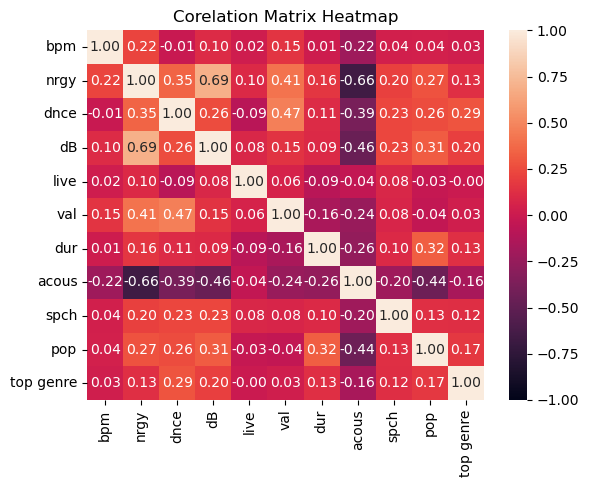

In [41]:
corr_matrix = train_data.corr()
ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.title('Corelation Matrix Heatmap')
#plt.savefig('Corelation_matrix.jpg')
plt.show()

In [42]:
y = train_data['top genre']
y

0       1
2       1
3       1
4      68
5      80
       ..
448     1
449    25
450    51
451    24
452     4
Name: top genre, Length: 438, dtype: int32

In [43]:
X = train_data.drop(['top genre', 'val', 'live', 'bpm', 'acous'], axis=1)
X.head()

,nrgy,dnce,dB,dur,spch,pop
0,31,45,-8,150,3,44
2,36,63,-9,245,3,77
3,28,47,-16,232,3,67
4,47,56,-8,193,3,63
5,56,71,-7,223,6,74


In [44]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, homogeneity_score, completeness_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn import svm, tree
from sklearn.linear_model import SGDClassifier

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [46]:
model_1 = RandomForestClassifier(n_estimators=20)
model_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [47]:
mscore1 = model_1.score(X_test, y_test)
print('Our model performs with the accuracy of :', mscore1*100, '%')
print("Mean accuracy: ", cross_val_score(model_1, X_train, y_train, cv=5).mean())

Our model performs with the accuracy of : 28.40909090909091 %
Mean accuracy:  0.20239477503628445


C:\Users\Echo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [48]:
pred_labels = model_1.predict(X_test)
fone_score = f1_score(y_test, pred_labels, average = 'macro')
print("F1 score: ", fone_score)

F1 score:  0.024279072315057992


In [49]:
model_2 = svm.SVC()
model_2.fit(X_train, y_train)

SVC()

In [50]:
mscore2 = model_2.score(X_test, y_test)
print('Our model performs with the accuracy of :', mscore2*100, '%')
print("Mean accuracy: ", cross_val_score(model_2, X_train, y_train, cv=5).mean())

Our model performs with the accuracy of : 25.0 %


C:\Users\Echo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mean accuracy:  0.24833091436865024


In [51]:
pred_labels = model_2.predict(X_test)
fone_score = f1_score(y_test, pred_labels, average = 'macro')
print("F1 score: ", fone_score)

F1 score:  0.014267591141874984


In [52]:
model_21 = svm.SVC(kernel = 'poly', degree = 3)
model_21.fit(X_train, y_train)

SVC(kernel='poly')

In [53]:
mscore21 = model_21.score(X_test, y_test)
print('Our model performs with the accuracy of :', mscore21*100, '%')
print("Mean accuracy: ", cross_val_score(model_21, X_train, y_train, cv=5).mean())

Our model performs with the accuracy of : 26.136363636363637 %
Mean accuracy:  0.28272859216255447


C:\Users\Echo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [54]:
pred_labels = model_21.predict(X_test)
fone_score = f1_score(y_test, pred_labels, average = 'macro')
print("F1 score: ", fone_score)

F1 score:  0.018716884994235673


In [55]:
model_22 = svm.SVC(kernel = 'rbf')
model_22.fit(X_train, y_train)

SVC()

In [56]:
mscore22 = model_22.score(X_test, y_test)
print('Our model performs with the accuracy of :', mscore22*100, '%')
print("Mean accuracy: ", cross_val_score(model_22, X_train, y_train, cv=5).mean())

Our model performs with the accuracy of : 25.0 %


C:\Users\Echo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mean accuracy:  0.24833091436865024


In [57]:
pred_labels = model_22.predict(X_test)
fone_score = f1_score(y_test, pred_labels, average = 'macro')
print("F1 score: ", fone_score)

F1 score:  0.014267591141874984


In [58]:
model_4 = tree.DecisionTreeClassifier()
model_4.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
mscore4 = model_4.score(X_test, y_test)
print('Our model performs with the accuracy of :', mscore4*100, '%')
print("Mean accuracy: ", cross_val_score(model_4, X_train, y_train, cv=5).mean())

Our model performs with the accuracy of : 14.772727272727273 %
Mean accuracy:  0.13759071117561686


C:\Users\Echo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [60]:
pred_labels = model_4.predict(X_test)
fone_score = f1_score(y_test, pred_labels, average = 'macro')
print("F1 score: ", fone_score)

F1 score:  0.017953173713542377


In [61]:
model_5 = LogisticRegression(random_state=4)
model_5.fit(X_train, y_train)

C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=4)

In [62]:
mscore5 = model_5.score(X_test, y_test)
print('Our model performs with the accuracy of :', mscore5*100, '%')
print("Mean accuracy: ", cross_val_score(model_5, X_train, y_train, cv=5).mean())

Our model performs with the accuracy of : 20.454545454545457 %


C:\Users\Echo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stabl

Mean accuracy:  0.21386066763425257


C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Echo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [63]:
pred_labels = model_5.predict(X_test)
fone_score = f1_score(y_test, pred_labels, average = 'macro')
print("F1 score: ", fone_score)

F1 score:  0.02034202569916856


In [64]:
model_6 = GaussianNB()
model_6.fit(X_train, y_train)

GaussianNB()

In [65]:
mscore6 = model_6.score(X_test, y_test)
print('Our model performs with the accuracy of :', mscore6*100, '%')
print("Mean accuracy: ", cross_val_score(model_6, X_train, y_train, cv=5).mean())

Our model performs with the accuracy of : 18.75 %
Mean accuracy:  0.19470246734397678


C:\Users\Echo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [66]:
pred_labels = model_6.predict(X_test)
fone_score = f1_score(y_test, pred_labels, average = 'macro')
print("F1 score: ", fone_score)

F1 score:  0.021975187565513362


In [67]:
model_7 = KNeighborsClassifier(n_neighbors=15)
model_7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [68]:
mscore7 = model_7.score(X_test, y_test)
print('Our model performs with the accuracy of :', mscore7*100, '%')
print("Mean accuracy: ", cross_val_score(model_7, X_train, y_train, cv=5).mean())

Our model performs with the accuracy of : 27.84090909090909 %
Mean accuracy:  0.21378809869375903


C:\Users\Echo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Echo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Echo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavi

In [69]:
pred_labels = model_7.predict(X_test)
fone_score = f1_score(y_test, pred_labels, average = 'macro')
print("F1 score: ", fone_score)

F1 score:  0.021588252881061098


C:\Users\Echo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Testing with Test Data

In [70]:
test_data = pd.read_csv('CS98XClassificationTest.csv')
test_data.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,454,Pump It,The Black Eyed Peas,2005,154,93,65,-3,75,74,213,1,18,72
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,1994,161,39,30,-15,11,14,292,26,3,59
2,456,We Are The Champions - Remastered 2011,Queen,1977,64,46,27,-7,12,18,179,38,3,76
3,457,Insomnia - Radio Edit,Faithless,2010,127,92,71,-9,37,53,216,6,4,50
4,458,This Eve of Parting,John Hartford,2018,115,46,56,-12,21,34,153,18,3,44


In [71]:
Id_col = test_data['Id']

In [72]:
test_data.drop(['Id', 'title', 'artist', 'year', 'live', 'val', 'bpm', 'acous'], axis = 1, inplace=True)

In [73]:
test_data

,nrgy,dnce,dB,dur,spch,pop
0,93,65,-3,213,18,72
1,39,30,-15,292,3,59
2,46,27,-7,179,3,76
3,92,71,-9,216,4,50
4,46,56,-12,153,3,44
...,...,...,...,...,...,...
108,57,61,-8,209,47,78
109,89,67,-6,215,3,44
110,58,78,-7,253,27,74
111,97,72,-5,287,14,71


In [74]:
Id_col

0      454
1      455
2      456
3      457
4      458
      ... 
108    563
109    564
110    565
111    566
112    567
Name: Id, Length: 113, dtype: int64

In [75]:
test_data.iloc[0, :]

nrgy     93
dnce     65
dB       -3
dur     213
spch     18
pop      72
Name: 0, dtype: int64

In [76]:
results = model_21.predict(test_data)

In [77]:
test_data['Id'] = Id_col

In [78]:
test_data

,nrgy,dnce,dB,dur,spch,pop,Id
0,93,65,-3,213,18,72,454
1,39,30,-15,292,3,59,455
2,46,27,-7,179,3,76,456
3,92,71,-9,216,4,50,457
4,46,56,-12,153,3,44,458
...,...,...,...,...,...,...,...
108,57,61,-8,209,47,78,563
109,89,67,-6,215,3,44,564
110,58,78,-7,253,27,74,565
111,97,72,-5,287,14,71,566


In [79]:
results = encoder.inverse_transform(results)

In [80]:
results

array(['album rock', 'album rock', 'adult standards', 'album rock',
       'adult standards', 'album rock', 'adult standards',
       'adult standards', 'album rock', 'album rock', 'adult standards',
       'album rock', 'adult standards', 'adult standards', 'album rock',
       'album rock', 'adult standards', 'album rock', 'dance pop',
       'album rock', 'adult standards', 'adult standards',
       'adult standards', 'adult standards', 'adult standards',
       'dance pop', 'album rock', 'adult standards', 'adult standards',
       'dance pop', 'album rock', 'adult standards', 'adult standards',
       'dance pop', 'dance pop', 'dance pop', 'dance pop',
       'adult standards', 'album rock', 'dance pop', 'album rock',
       'bebop', 'album rock', 'adult standards', 'adult standards',
       'adult standards', 'album rock', 'dance pop', 'album rock',
       'album rock', 'adult standards', 'album rock', 'dance pop',
       'adult standards', 'album rock', 'adult standards', 'album

In [81]:
test_data['top genre'] = results 

In [82]:
test_data

,nrgy,dnce,dB,dur,spch,pop,Id,top genre
0,93,65,-3,213,18,72,454,album rock
1,39,30,-15,292,3,59,455,album rock
2,46,27,-7,179,3,76,456,adult standards
3,92,71,-9,216,4,50,457,album rock
4,46,56,-12,153,3,44,458,adult standards
...,...,...,...,...,...,...,...,...
108,57,61,-8,209,47,78,563,album rock
109,89,67,-6,215,3,44,564,album rock
110,58,78,-7,253,27,74,565,dance pop
111,97,72,-5,287,14,71,566,dance pop


In [83]:
submission_data = test_data.drop(['nrgy', 'dnce', 'dB', 'dur','spch', 'pop'], axis = 1)

In [84]:
submission_data

,Id,top genre
0,454,album rock
1,455,album rock
2,456,adult standards
3,457,album rock
4,458,adult standards
...,...,...
108,563,album rock
109,564,album rock
110,565,dance pop
111,566,dance pop


In [85]:
submission_data.set_index('Id')

,top genre
Id,
454,album rock
455,album rock
456,adult standards
457,album rock
458,adult standards
...,...
563,album rock
564,album rock
565,dance pop


In [86]:
submission_data.to_csv("classification_submission2.csv")